<a href="https://colab.research.google.com/github/HenrySomeCode/Boston_House_Price_Prediction/blob/main/Boston__House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref:


*   AI/DL/Ml Course by Master Tuan Linh and TA - HUST
*   https://www.kaggle.com/code/anasmjali/linear-regression-boston-house-price-prediction/notebook 



# Steps to buid a ML model:

##1. Determine problem:
*   What is the pratical significance of the problem ? 

    https://www.researchgate.net/publication/362812590_Boston_House_Price_Prediction_Using_Regression_Models

##2 Collect & analyze the data:

*   Collect the data
*   Analyze the data:
  *   What's the data structure? Include what the feature is. 
  
      1. CRIM: per capita crime rate by town

              ( tỉ lệ tội phạm bình quan theo đầu người theo thị trấn ) 
      
      2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 

          ( tỷ lệ đất được quy hoach cho các lô đất trên 25000 sq.ft )
      3. INDUS: proportion of non-retail business acres per town.

          ( tỷ lệ mẫu đất kinh doanh không bán lẻ trên mỗi thị trấn )
      4. CHAOS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

            ( Biến giả Charles River (= 1 nếu đường bao quanh sông; 0 nếu ngược lại) )
      5. NOX: nitric oxides concentration (parts per 10 million) 

            ( nồng độ oxit nitric (phần trên 10 triệu) )
      6. RM: average number of rooms per dwelling
          
          ( số lượng phòng trung bình trên một ngôi nhà )
      7. AGE: proportion of owner-occupied units built prior to 1940

          ( tỷ lệ các căn hộ có chủ sở hữu được xây dựng trước năm 1940 )
      8. DIS: weighted distances to five Boston employment centres

          ( khoảng cách có trọng số đến năm trung tâm việc làm Boston )
      9. RAD: index of accessibility to radial highways 

          ( chỉ số khả năng tiếp cận các đường cao tốc hướng tâm )
      10. TAX: full-value property-tax rate per 10,000 dollars

          ( thuế suất tài sản toàn giá trị trên $ 10.000 )
      11. PTRATIO: pupil-teacher ratio by town
          
          ( tỷ lệ học sinh-giáo viên theo thị trấn )
      12. B1000: (Bk - 0.63)^2 where Bk is the proportion of blacks by town

          (Bk - 0,63) ^ 2 trong đó Bk là tỷ lệ người da đen theo thị trấn
      13. LSTAT: %lower status of the population 

          \% tình trạng dân số thấp

      Also, our target is MEDV - Median value of owner-occupied homes in 1000 dollars. 

      ( Giá trị trung bình của những ngôi nhà có chủ sở hữu tính bằng $ 1000)
  *   Visualization: to understand the story behind the data, correlation between the data, e.g hitmap
  *   Preprocessing: considering remove linearly depent features. Remove outliers, e.g PCA, Standard scaler. Adding conditions, assumptions to the ML model that are drawn from visualization. 
      
      Also, this helps in working with non-tech departments in terms of conveying the meaning of data.
  *   Split data into train, valid, test dataset (mostly in supervised learning)

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import packages 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
import os
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score, r2_score, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
#Model Selection
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN

# Normalize
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import RobustScaler



In [ ]:
# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [ ]:
print(os.getcwd())

/content


In [ ]:
data_dir ="/content/drive/MyDrive/AI_ML_DL Course_by_Master_Linh_HUST/week1/Teaching Assistant/week1/data/housing.csv"

In [ ]:
# read data and view first 10 rows
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#delim_whitespace => each elements in a row is separated by whitespace characters
house_data = pd.read_csv(data_dir, header=None, delim_whitespace=True, names=column_names)
house_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


What's the data structure ?

Each row in the dataset describes a Boston town or suburb.

In [ ]:
house_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


*   There are a total of 506 non-null observations in each column. This means that there are no missing values in the data.
*   Each column contains data in the type of number in nature.




In [ ]:
house_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


*   Crime rate average is 3.6, with low crime rates in half of the towns (25%: 0.08 and 50%: 0.25) and high rates in other towns.
*   50% of Boston towns have no zoned lands for a large lot
*   The mean of CHAS is 0.07, which means most of the houses are not on the riverside 



Visualization

Univariate analysis

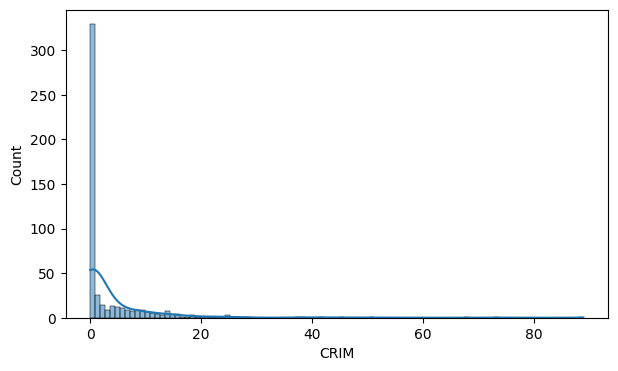

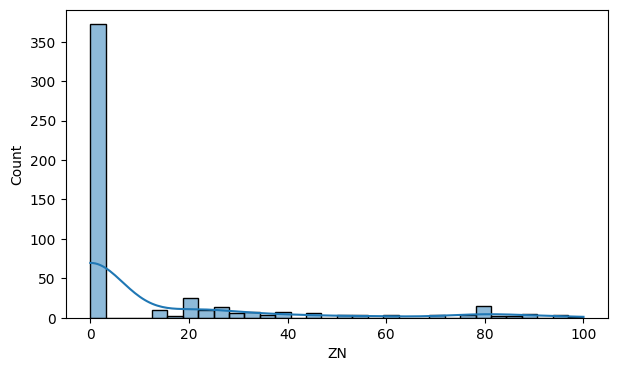

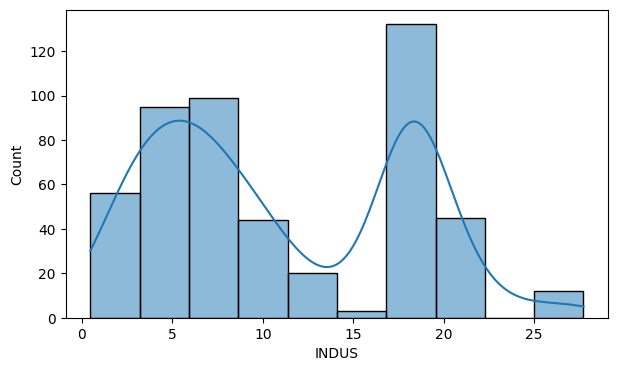

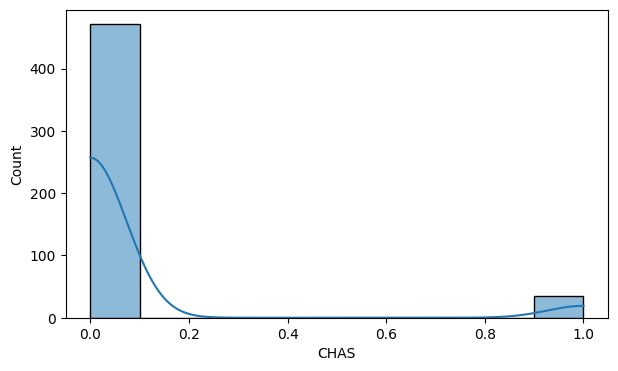

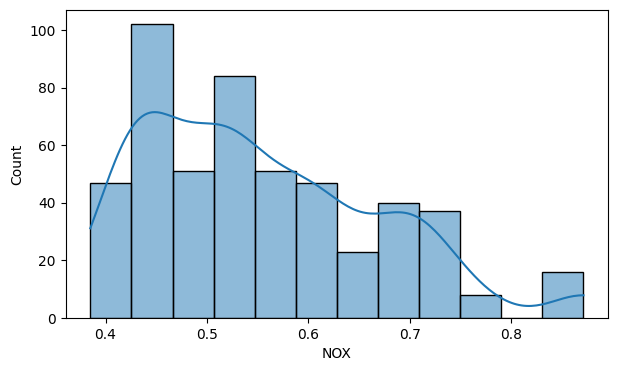

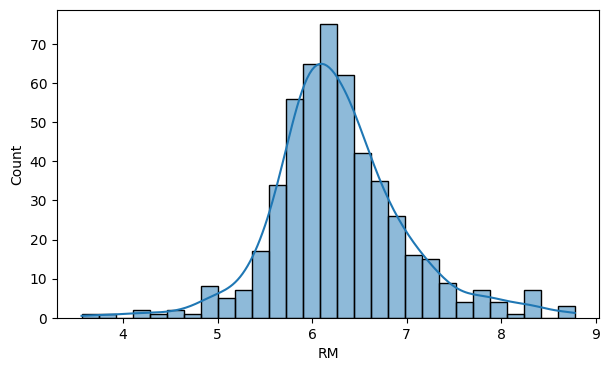

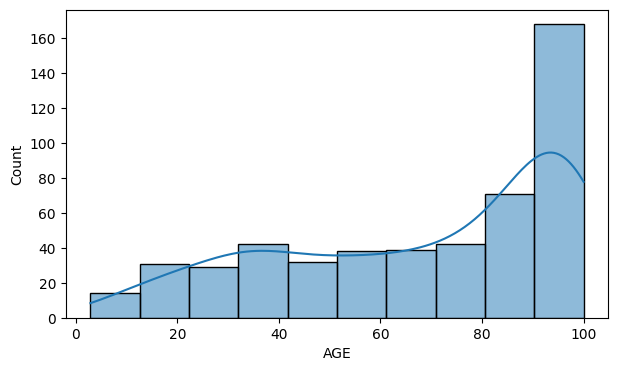

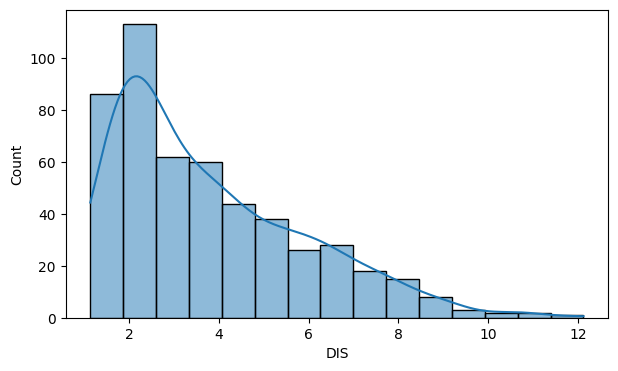

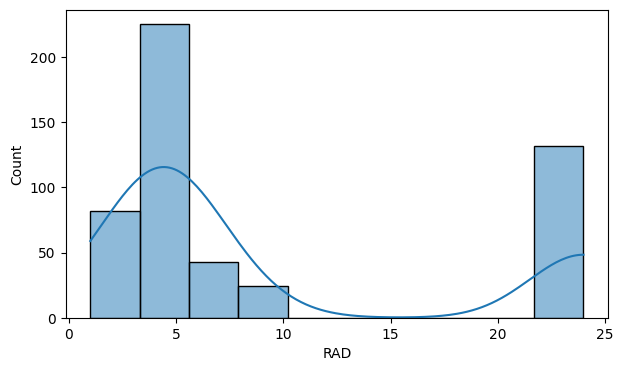

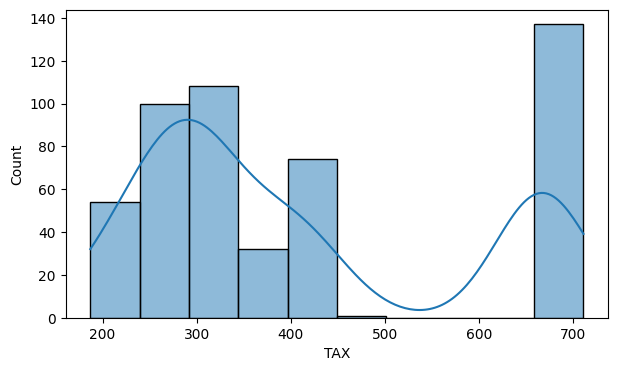

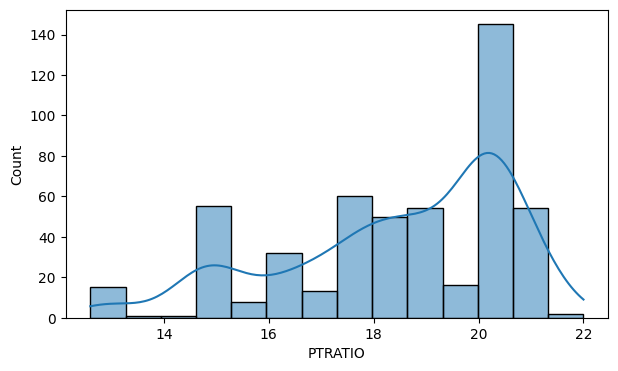

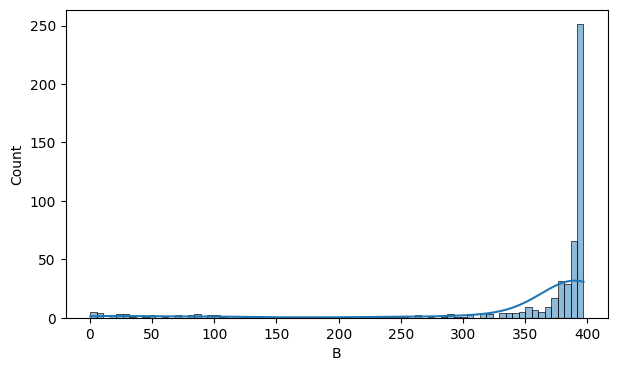

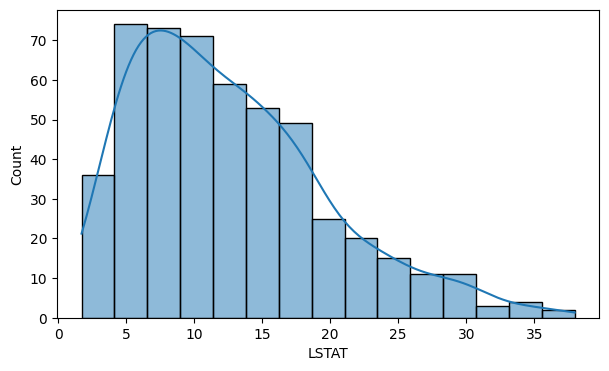

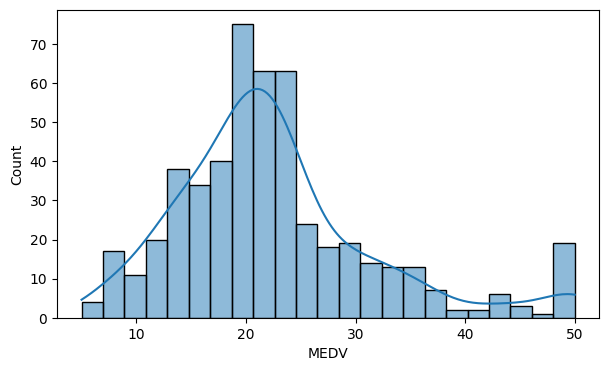

In [ ]:
# Plot all the comuns to see their distributions
for i in house_data.columns:
    plt.figure(figsize=(7,4))
    sns.histplot(data=house_data,x=i,kde=True)
    plt.show()

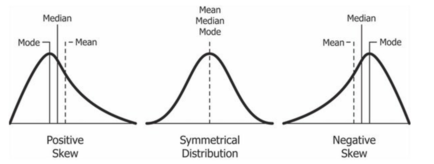

* The CRIM and ZN variables are positively shewed. This suggest that most of the towns or suburbs have lower crime rates and most residential lands are under 25,000 sq.ft.

* The CHAS variable, with only 2 possible values 0 and 1, follows a binomial distribution. Look at the chart, the majority of the houses are not near the Charles river.

* The distribution of the AGE variable points out that many towns has owner-occupied houses were built before 1940.

* The DIS variable shows that most of the houses are closer to the employment centers.

* The TAX and RAD variables have bimodal distributions. This suggest that the tax rate is possibly higher for some areas which have a high index of accessibility to radial highways.

* The dependent variable MEDV seems to be slightly right skewed. It's kinda a mix of right skew and symmetrical distribution.






Bivariate Analysis

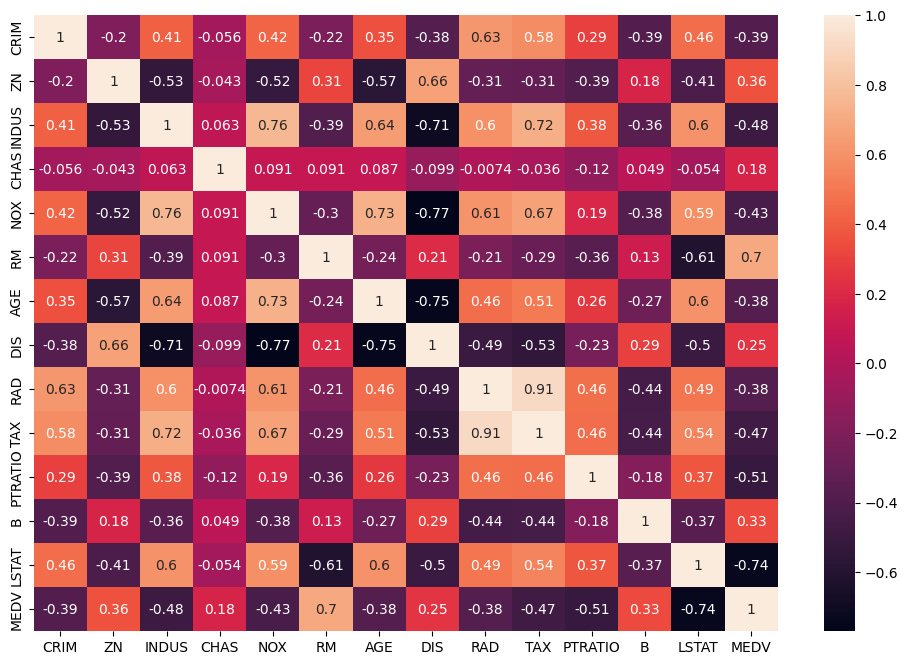

In [ ]:
# check the coorrelation using heatmap 
plt.figure(figsize=(12,8))
#annot = True => write the value in each cell
sns.heatmap(house_data.corr(), annot=True)
plt.show()

My observations:

* The proportion of non-retail business acres is positively correlated with nitric oxide concentration. This seems to mean that towns with a high index of non-retail business areas will have higher nitric oxides concentration.

* Also, proportion of non-retail business acres is positively correlated with taxes. This implies that higher taxes are applied on houses in town with high index of non-retail business areas.

* Number of room is positively correlated with house price.

*  Nitric oxides concentration is positively correlated with owener-occupied buidings. This could transitively imply that old houses are nearer to non-retail business areas. These areas are positively correlaed with nitric oxides concentration.

* Distance from employment enters is negatiely correlated with non-retail business areas, nitric oxides concentration, and owner-occupied buidings. This suggest that towns away from employment centers have more recent houses, less nitric oxides concentration.

* Prices of house is negatively correlated with low status of population which makes sense.



Now, we will visualize the relationship between the pairs of features having significan correlations ( >0.7)

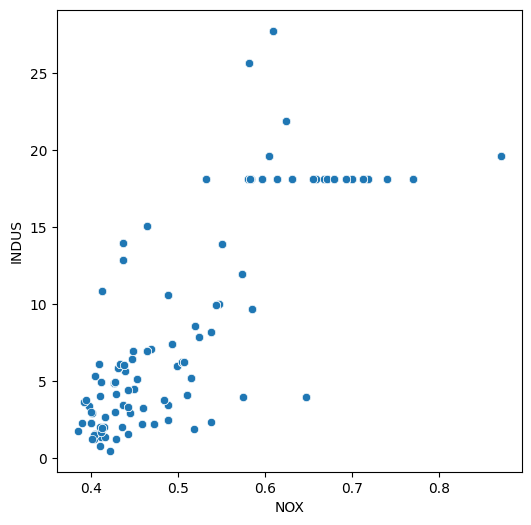

In [ ]:
# scatterplot to see the relationship between NOX and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x=house_data['NOX'], y=house_data['INDUS'], data=house_data)
plt.show()

My observation: It seems that there is no pattern in this correlation between the two feaure

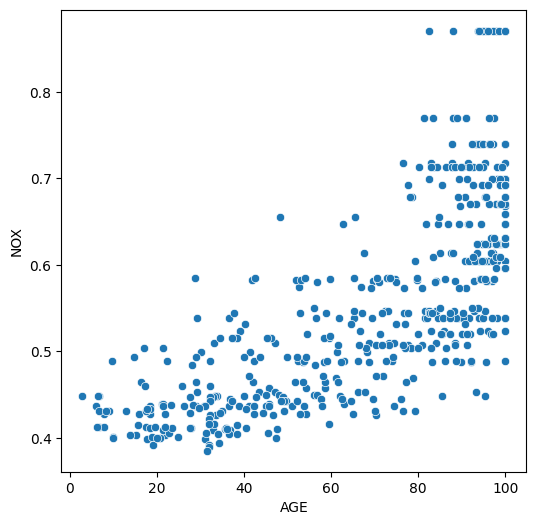

In [ ]:
# scatterplot to see the relationship between AGE and NOX
plt.figure(figsize=(6, 6))
sns.scatterplot(x=house_data['AGE'], y=house_data['NOX'], data=house_data)

plt.show()

Observations:
* The more proportion of owner-occupied units built prior to 1940 exist, the more nitric oxides concentration. This could imply that old owner-occupied houses are near to the oxide source than recently-built houses.

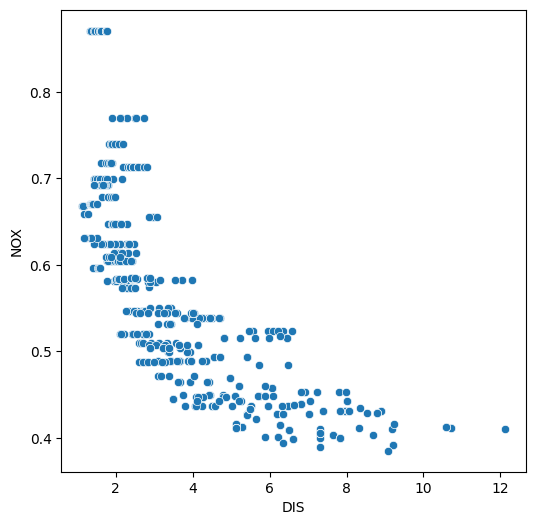

In [ ]:
# scatterplot to see the relationship between DIS and NOX
plt.figure(figsize=(6, 6))
sns.scatterplot(y=house_data['NOX'], x=house_data['DIS'], data=house_data)

plt.show()

My observations: 

* The distant house is from employement centers, the less oxide concentraion is. This suggest that employement enters are close to nitric oxides source.

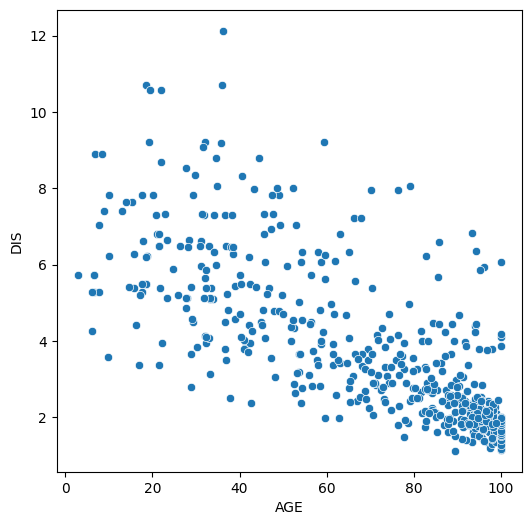

In [ ]:
# scatterplot to see the relationship between AGE and DIS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'DIS', data = house_data)
plt.show()

My observation:

* The distance of the houses to employment centers appears to decrease moderately as the proportion of the old houses increase in the town.

  This suggest that the employment centers are located in the established towns where the propotion of owner-occupied units built prior to 1940 is comparatively high.

* Wih previous observation, I can possibly make an assumption that old owner-occupied houses built prior to 1940 are closer to employment centers which are near nitric oxides source or maybe emitting oxides.


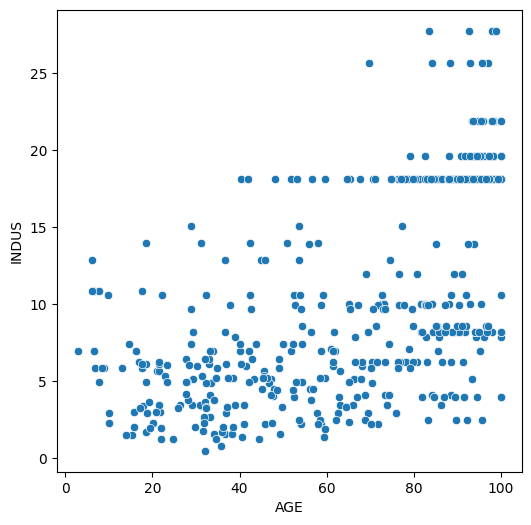

In [ ]:
# scatterplot to see the relationship between AGE and INDUS
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'AGE', y = 'INDUS', data = house_data)
plt.show()

My observation:

* It seems that there is no pattern here

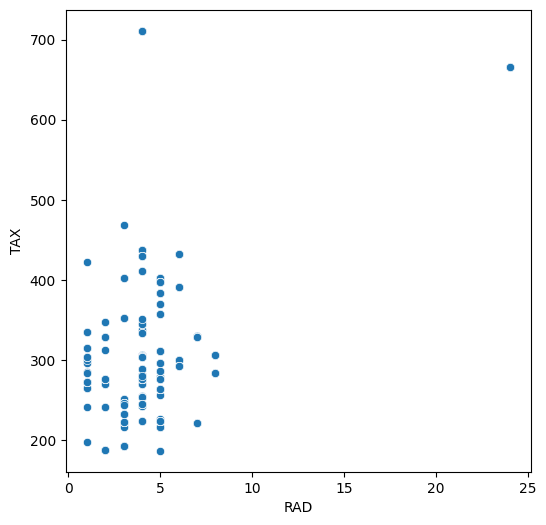

In [ ]:
# scatterplot to see the relationship between RAD and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RAD', y = 'TAX', data = house_data)
plt.show()

The correlation between RAD and TAX is very high (0.91). However, it seems that there is no trend between those variables. This might be due to outliers.

In [ ]:
from scipy.stats import pearsonr

In [ ]:
df1 = house_data[house_data['TAX'] < 600]

In [ ]:
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


So the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

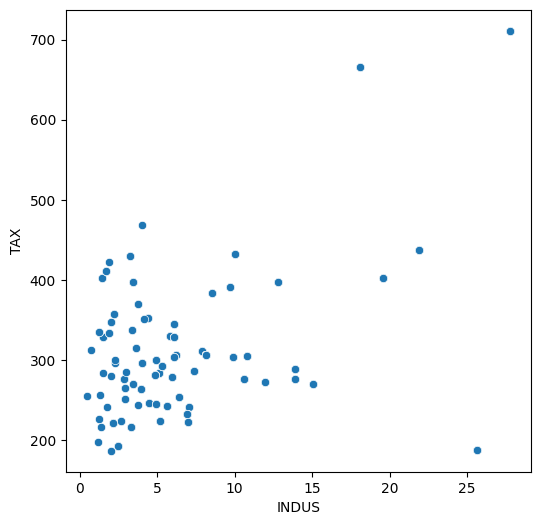

In [ ]:
# scatterplot to see the relationship between INDUS and TAX
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'INDUS', y = 'TAX', data = house_data)
plt.show()

My observation: 

* The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

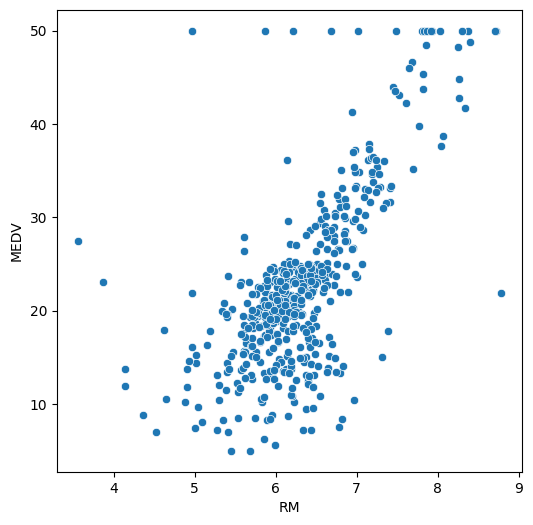

In [ ]:
# scatterplot to see the relationship between RM and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'RM', y = 'MEDV', data = house_data)
plt.show()

My observation:

* The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

* There are a few outliers in a horizotal line as the MEDV value seems to be limited at 50. So no remove outliers here.

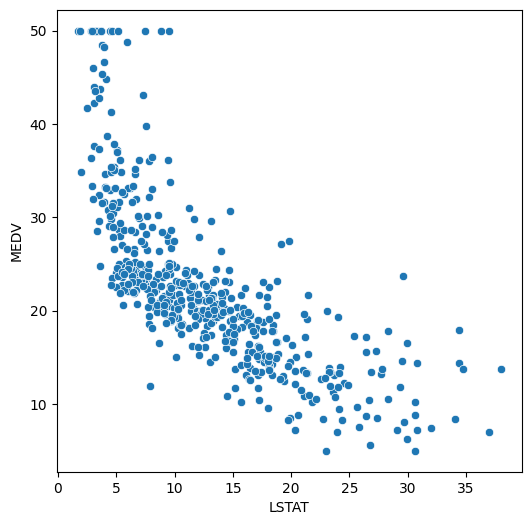

In [ ]:
# scatterplot to see the relationship between LSTAT and MEDV
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = house_data)
plt.show()

My observation:
* The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.

* There are few outliers and the data seems to be capped at 50.

Split the dataset

In [ ]:
Y = house_data['MEDV']
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:
X = house_data.drop(columns= {'MEDV'})
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=8)

After collecting and analyzing data, these are what should be done in real-life projects:

3. Build the model.
4. Fine-tune.
5. Use & monitor the model.

Since this project is just for learning regression problem, I'm not going to go deeper into these, though.

Testing models with origin data

In [221]:
scaler = StandardScaler()
transform = scaler.fit(X_train)
X_train = transform.transform(X_train)
X_test = transform.transform(X_test)

Linear Regression

In [222]:
linear = LinearRegression()
linear.fit(X_train, y_train)

print("MSE loss on train dataset: %.2f" % mean_squared_error(y_train, linear.predict(X_train)))
print("MSE loss on test dataset: %.2f" % mean_squared_error(y_test, linear.predict(X_test)))

MSE loss on train dataset: 21.45
MSE loss on test dataset: 23.72


KNN

In [223]:
knn = KNN()
knn.fit(X_train, y_train)

print("MSE loss on train dataset : %.2f" % mean_squared_error(y_train, knn.predict(X_train)))
print("MSE loss on test dataset: %.2f" % mean_squared_error(y_test, knn.predict(X_test)))

MSE loss on train dataset : 15.60
MSE loss on test dataset: 23.12


Testing models with data after analyzing

In [224]:
def drop_with_high_corr(table, threshold):
    # Lấy giá trị tuyệt đối các giá trị trong bảng
    corr_matrix = table.corr().abs()
    # Tính trung bình hệ số tương quan cho mỗi trường đối với trường còn lại
    avg_corr_matrix = corr_matrix.mean(axis = 1)
    # Tạo ma trận tam giác trên từ corr_matrix 
    up = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    
    # List các cột xóa
    drop_columns = list()

    for row in range(len(up)-1):
        col_idx = row + 1
        # row != col 
        for col in range (col_idx, len(up) - 1):
            if(corr_matrix.iloc[row, col] > threshold):
                # Chọn đặc trưng nào có trung bình hệ số tương quan lớn hơn
                if(avg_corr_matrix.iloc[row] > avg_corr_matrix.iloc[col]): 
                    drop_columns.append(row)
                else: 
                    drop_columns.append(col)
    
    # Dùng set để khiến mỗi phân tử bên trong mảng drop là duy nhất
    drop_set = list(set(drop_columns))
    dropcols_names = list(table.columns[[item for item in drop_set]])
    
    return dropcols_names

In [225]:
drop_columns = drop_with_high_corr(house_data, 0.8)
print(drop_columns)

['TAX']


In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=8)

In [227]:
X_train = X_train.drop(['TAX'],1)
X_test = X_test.drop(['TAX'],1)

In [228]:
scaler = StandardScaler()
transform = scaler.fit(X_train)
X_train = transform.transform(X_train)
X_test = transform.transform(X_test)

In [229]:
linear = LinearRegression()
linear.fit(X_train, y_train)

print("MSE loss on train dataset: %.2f" % mean_squared_error(y_train, linear.predict(X_train)))
print("MSE loss on test dataset: %.2f" % mean_squared_error(y_test, linear.predict(X_test)))

MSE loss on train dataset: 21.89
MSE loss on test dataset: 24.28


In [230]:
knn = KNN()
knn.fit(X_train, y_train)

print("MSE loss on train dataset : %.2f" % mean_squared_error(y_train, knn.predict(X_train)))
print("MSE loss on test dataset: %.2f" % mean_squared_error(y_test, knn.predict(X_test)))

MSE loss on train dataset : 15.41
MSE loss on test dataset: 23.52


Well, the result doesn't get any better ... so theory maybe not always easy to apply. But when I look back at the correlation of features, I found this:




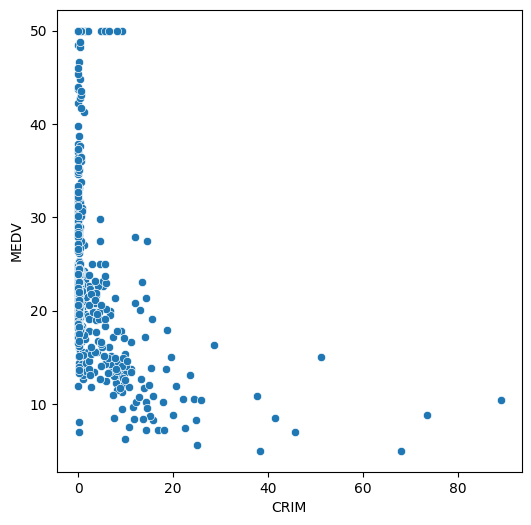

In [365]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'CRIM', y = 'MEDV', data = house_data)
plt.show()

As we analyzed before, these features don't relate to each other. And the CRIM data is kinda complicated, so I want to make this data simpler for my model to learn it easier. 

For that reason, the CRIM data should be either 1 or 0, meaning low or high crime rates. But...what threshold to decide what crime rates to 0 and what to 1.

Looking at the chart, we can draw an assumption that if CRIM > 5%, the MEDV tends to lower. This suggests that values larger than 5% are high. So if the crim rate is higher than 5%, it's 1. Otherwise, it's 0.



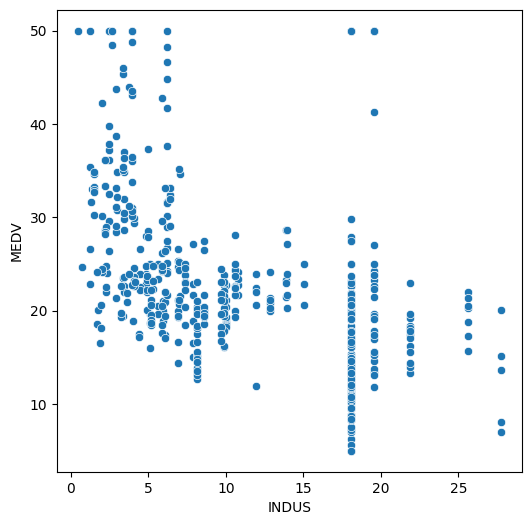

In [370]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'INDUS', y = 'MEDV', data = house_data)
plt.show()

Most of the towns that have INDUS >= 10 all have MeDV less than 30. So I can try to do the same I did with CRIM. If INDUS >= 10 then it's 1, the rest is 0

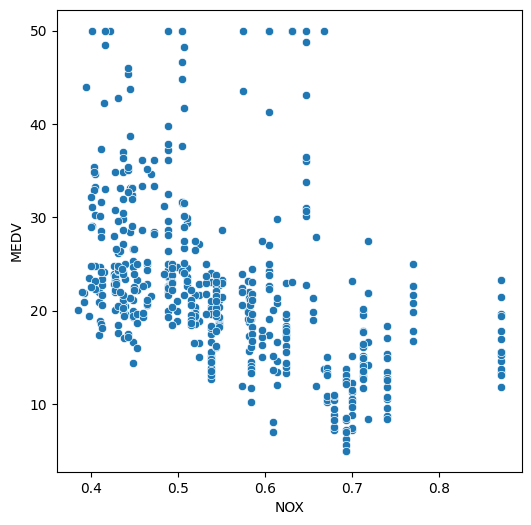

In [371]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'NOX', y = 'MEDV', data = house_data)
plt.show()

Most of the towns that have NOX >= 0.65 all have MeDV less than 30. So if NOX >= 0.65, then it's 1, otherwise it is 0.

Finally, I applied these assumptions to the data, and it helped improve the model. You can see that through the loss score !!!

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=8)

In [373]:
def thresh_func(table, col, threshold):
  new_value = []
  for value in table[col]:
    if value >= threshold:
      new_value.append(1)
    else:
      new_value.append(0)
  return pd.Series(new_value)

In [374]:
# CRIM
X_train["CRIM"] = thresh_func(X_train, "CRIM", 5).values
X_test["CRIM"] = thresh_func(X_test, "CRIM", 5).values

# INDUS
X_train["INDUS"] = thresh_func(X_train, "INDUS", 10).values
X_test["INDUS"] = thresh_func(X_test, "INDUS", 10).values

# NOX
X_train["NOX"] = thresh_func(X_train, "NOX", 0.65).values
X_test["NOX"] = thresh_func(X_test, "NOX", 0.65).values

In [375]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
17,0,0.0,0,0,0,5.990,81.7,4.2579,4,307.0,21.0,386.75,14.67
84,0,0.0,0,0,0,6.389,48.0,4.7794,3,247.0,18.5,396.90,9.62
396,1,0.0,1,0,1,6.405,96.0,1.6768,24,666.0,20.2,396.90,19.37
141,0,0.0,1,0,0,5.019,100.0,1.4394,4,437.0,21.2,396.90,34.41
294,0,0.0,1,0,0,6.009,42.3,5.5027,4,289.0,16.0,396.90,10.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0,0.0,1,0,0,5.822,95.4,2.4699,4,437.0,21.2,388.69,15.03
361,0,0.0,1,0,1,6.251,91.1,2.2955,24,666.0,20.2,350.65,14.19
497,0,0.0,0,0,0,5.794,70.6,2.8927,6,391.0,19.2,396.90,14.10
340,0,0.0,0,0,0,5.968,58.5,4.8122,5,224.0,20.2,396.90,9.29


In [376]:
scaler = StandardScaler()
transform = scaler.fit(X_train)
X_train = transform.transform(X_train)
X_test = transform.transform(X_test)

In [377]:
linear = LinearRegression()
linear.fit(X_train, y_train)

print("MSE loss on train dataset: %.2f" % mean_squared_error(y_train, linear.predict(X_train)))
print("MSE loss on test dataset: %.2f" % mean_squared_error(y_test, linear.predict(X_test)))

MSE loss on train dataset: 20.61
MSE loss on test dataset: 22.98


....